In [179]:
import pandas as pd ; import numpy as np; import seaborn as sns; import matplotlib.pyplot as plt

In [180]:
#İmporting the dataset
df = pd.read_csv('./data/HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [181]:
#Data Preprocessing

#Checking for missing values
df.isnull().sum()


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [182]:
import missingno as msno #Missingno is a library for visualizing missing values


<Axes: >

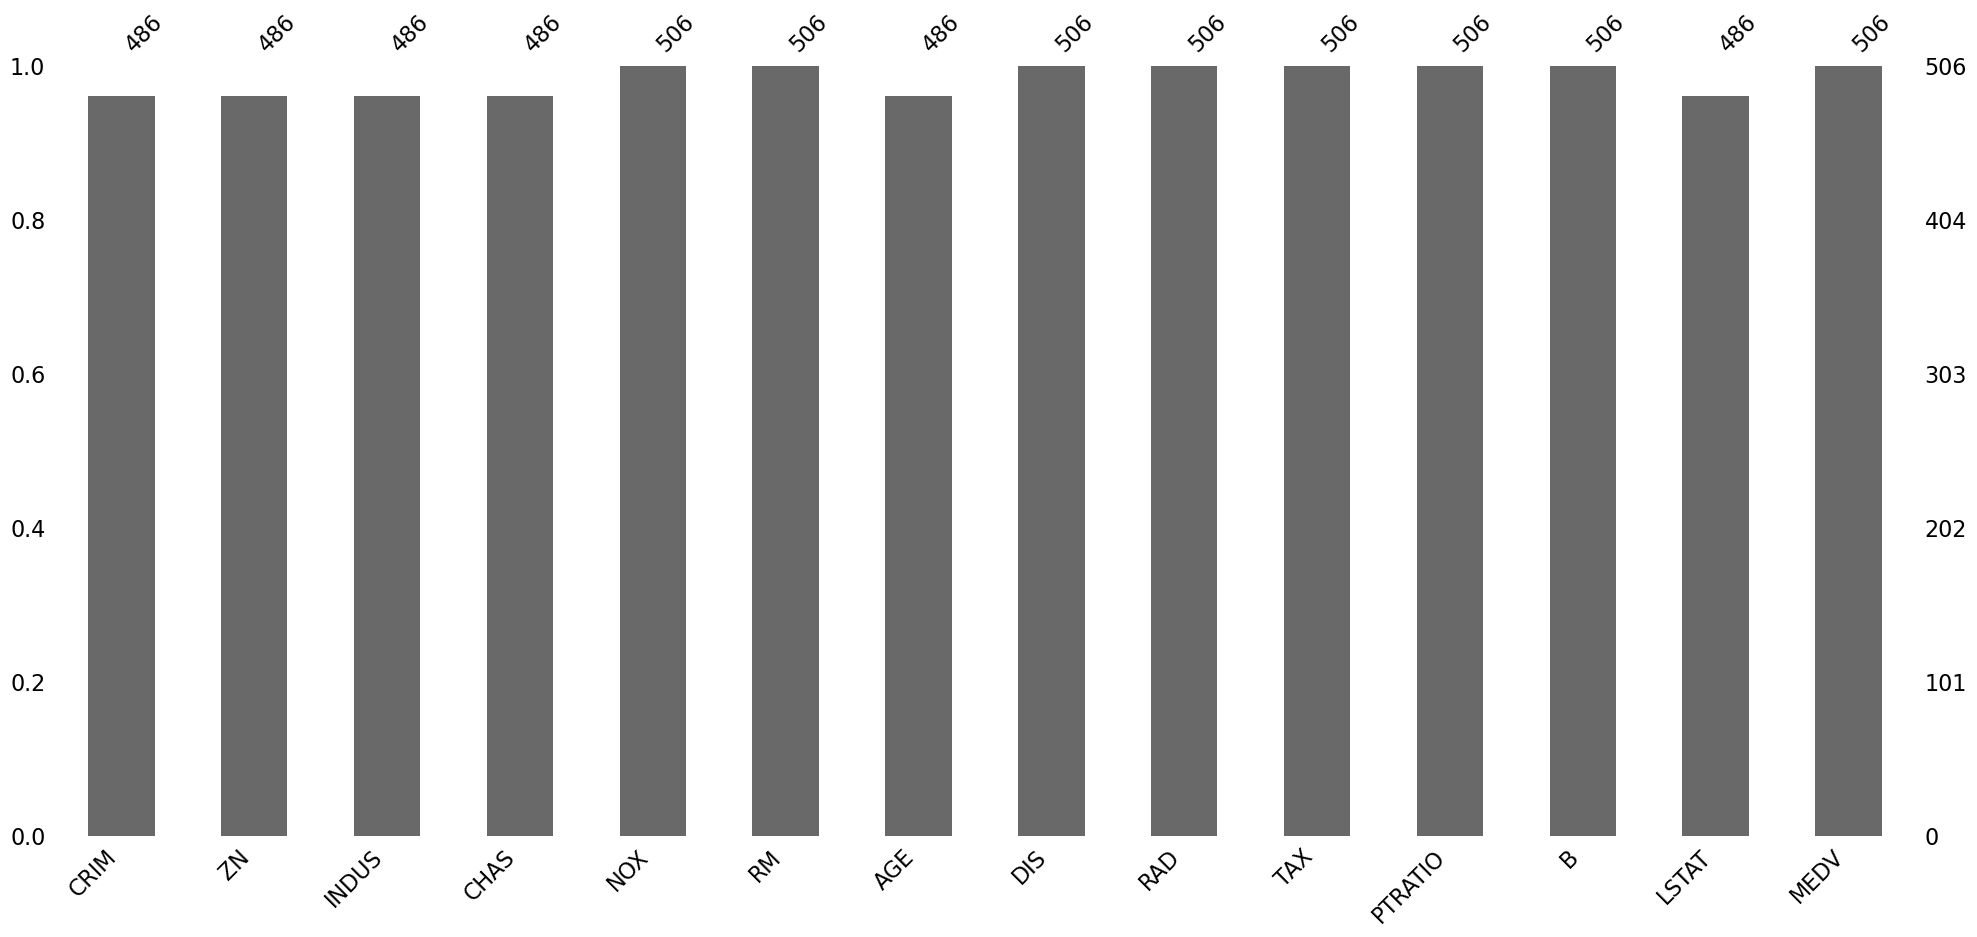

In [210]:
msno.bar(df) #Good way to visualize missing values

In [ ]:
#filling missing values
fill_df= df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [ ]:
fill_df.isnull().sum() #Checking for missing values-

In [ ]:
#Checking for duplicates
df.duplicated().sum()

In [ ]:
#Outlier Detection

#Boxplot

sns.boxplot(fill_df,orient='h')


In [ ]:
def OutlierIQR(DataFrame, column_name): #IQR method
    IQR = DataFrame[column_name].quantile(0.75) - DataFrame[column_name].quantile(0.25)
    lower = DataFrame[column_name].quantile(0.25) - 1.5*IQR
    upper = DataFrame[column_name].quantile(0.75) + 1.5*IQR
    return DataFrame[(DataFrame[column_name] < lower) | (DataFrame[column_name] > upper)]

In [ ]:
#Outliers
for i in fill_df.columns:
    if fill_df[i].dtype != 'object':
        print(i, OutlierIQR(fill_df,i))
        

In [ ]:


OutlierIQR(fill_df,'MEDV')['MEDV'] #MEDV column has outliers

In [ ]:
fill_df['MEDV'] 

In [ ]:
#  Removing outliers
fill_df = fill_df[~((fill_df['MEDV'] < 10) | (fill_df['MEDV'] > 49))]

In [ ]:
OutlierIQR(fill_df,'MEDV')['MEDV'].shape

In [ ]:
data = fill_df.copy()

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
data.describe().T

In [ ]:
#Correlation text

data.corr()



In [ ]:
# Feature Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = data.drop('MEDV',axis=1)

y = data['MEDV']

bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.sort_values(by='Score',ascending=False,inplace=True)
featureScores

In [ ]:
#Feature selection

#data = data.drop(['RAD'],axis=1)  #RAD is nothing compared to TAX


In [185]:
#Feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.410216,0.284896,-1.276151,-0.265196,-0.080510,0.471824,-0.067088,0.069184,-0.611925,-1.473644,0.422073,-1.160712,0.223589
1,-0.407017,-0.503533,-0.548199,-0.265196,-0.680497,0.231924,0.431394,0.486231,-0.947323,-0.298079,0.422073,-0.501053,-0.101843
2,-0.407020,-0.503533,-0.548199,-0.265196,-0.680497,1.422078,-0.216269,0.486231,-0.947323,-0.298079,0.372458,-1.311355,1.674470
3,-0.406245,-0.503533,-1.296032,-0.265196,-0.776148,1.130771,-0.772967,1.006934,-1.071545,0.125125,0.394401,-1.484199,1.498195
4,-0.400654,-0.503533,-1.296032,-0.265196,-0.776148,1.362882,-0.467329,1.006934,-1.071545,0.125125,0.422073,0.065910,1.877865


In [186]:
#Splitting the dataset

from sklearn.model_selection import train_test_split

X = data.drop('MEDV',axis=1)

y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [187]:
#Model Building

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)


LinearRegression()

In [211]:

#Model Evaluation

from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)

MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))


#Model Evaluation

from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)

MSE,RMSE,r2



(0.22173392466854636, 0.4708863182006315, 0.7442046786238936)

In [197]:
#Cross Validation

from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(model,X,y,cv=5)

cv_score.mean()

model.get_params()


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [199]:
#Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

parameters = {'fit_intercept':[True,False], 'copy_X':[True, False]}

tuning = GridSearchCV(model, parameters, cv=5, scoring='r2', n_jobs=-1, verbose=2)
tuning.fit(X, y)

tuning.best_params_


Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'copy_X': True, 'fit_intercept': False}

In [ ]:
#Model Building

model = LinearRegression(copy_X=tuning.best_params_['copy_X'], fit_intercept=tuning.best_params_['fit_intercept'])

model.fit(X_train,y_train)


In [212]:
#Model Evaluation

y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
MSE,RMSE,r2


(0.22173392466854636, 0.4708863182006315, 0.7442046786238936)

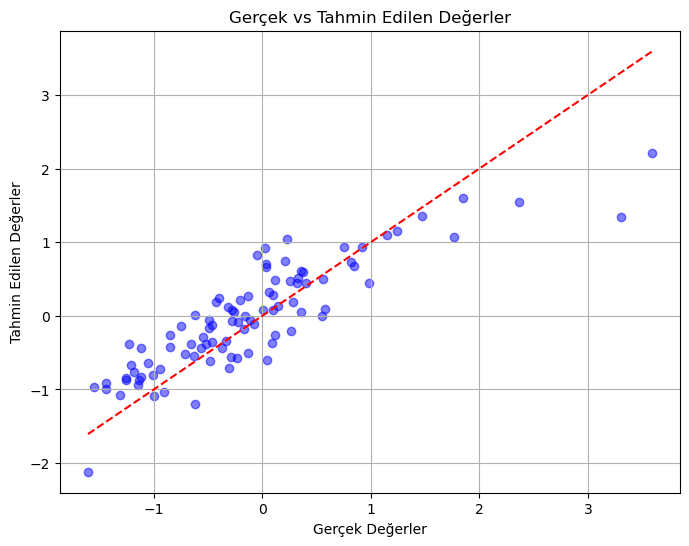

In [204]:
#Visualizing the results

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Alpha, noktaların şeffaflığını ayarlar
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Gerçek ve tahmin arasında ideal doğru
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek vs Tahmin Edilen Değerler')
plt.grid(True)
plt.show()

C:\Users\firat\AppData\Local\Temp\ipykernel_4544\2646872399.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)
C:\Users\firat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


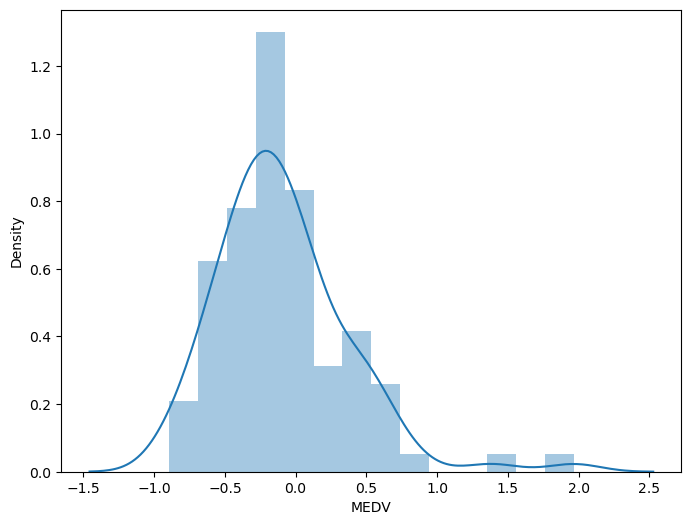

In [206]:
#Visualizing the results

plt.figure(figsize=(8, 6))

sns.distplot(y_test-y_pred)

plt.show()
